In [ ]:
import pandas as pd
import csv
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import random
import math
import seaborn as sns
from sklearn.metrics import roc_auc_score

# **Classification**

In [ ]:
data_set = pd.read_csv('AllDataSet.csv')
data_set.head()

,id,label,jml_follower,jml_following,mention,hastag,website,retweet,media_url,tanda_baca,...,721,722,728,746,752,754,757,762,764,765
0,1,Neuroticism,105,49,479,11,36,2,NaN,2106,...,0.012869,0.032467,-0.014243,0.056431,-0.190102,-0.133624,0.082301,-0.042016,0.311106,-0.290549
1,2,Neuroticism,208,3,35,1,0,0,NaN,23,...,0.028648,-0.033911,0.025756,0.050759,-0.156194,0.000192,0.082167,0.030049,0.252277,-0.164396
2,3,Extraversion,28,6,15,0,14,0,NaN,116,...,-0.038000,0.057100,0.079510,0.118533,0.096690,0.018579,-0.003807,0.224666,0.224184,-0.237395
3,4,Neuroticism,12,5,4,0,0,0,NaN,11,...,0.018069,0.035932,-0.056163,0.075076,-0.183413,-0.178944,0.050251,0.033786,0.224241,-0.164161
4,5,Neuroticism,29,7,6,0,4,0,NaN,35,...,0.001721,0.057157,-0.049383,0.058470,-0.169798,-0.099824,0.031424,0.060765,0.302660,-0.226166


In [ ]:
data_set.isnull().values.any()
data_set = data_set.dropna()
data_set.head()

,id,label,jml_follower,jml_following,mention,hastag,website,retweet,media_url,tanda_baca,...,721,722,728,746,752,754,757,762,764,765
33,34,Extraversion,164,230,504,9,52,63,136.0,64,...,0.015003,0.038156,-0.081351,0.071780,-0.232008,-0.215532,0.075254,-0.046680,0.284958,-0.177090
34,35,Extraversion,80,117,936,60,59,662,450.0,158,...,0.031063,0.022182,-0.096391,0.024535,-0.128984,-0.217036,0.090163,0.001545,0.226108,-0.194871
35,36,Extraversion,148,139,1051,163,106,589,188.0,293,...,0.040425,0.071166,-0.126330,0.066945,-0.198566,-0.216991,0.119759,-0.083423,0.366744,-0.204381
36,37,Conscientiousness,275,269,427,9,69,35,85.0,121,...,0.051377,0.039937,-0.101809,0.053524,0.034927,-0.220603,0.058793,-0.078397,0.376519,-0.255085
37,38,Conscientiousness,41,68,53,0,1,6,12.0,22,...,0.031145,0.037189,-0.088004,0.028464,-0.062389,-0.217802,0.109567,-0.088614,0.440110,-0.149171


In [ ]:
data_set.dtypes

id                 int64
label             object
jml_follower       int64
jml_following      int64
mention            int64
                  ...   
754              float64
757              float64
762              float64
764              float64
765              float64
Length: 312, dtype: object

**Pre Prosess**

In [ ]:
print(data_set.columns.tolist())


['id', 'label', 'jml_follower', 'jml_following', 'mention', 'hastag', 'website', 'retweet', 'media_url', 'tanda_baca', 'huruf_kapital', 'jml_tweet', 'Sum of orang pertama', 'Sum of orang kedua', 'Sum of Orang ketiga', 'Sum of orang jamak', 'Sum of kata ganti', 'Sum of negasi', 'Sum of persetujuan', 'Sum of preposisi', 'Sum of angka', 'Sum of mempengaruhi', 'Sum of perasaan positif', 'Sum of emosi negatif', 'Sum of kegelisahan', 'Sum of marah', 'Sum of sedih', 'Sum of perbedaan', 'Sum of belum pasti', 'Sum of kepastian', 'Sum of melihat', 'Sum of pendengaran', 'Sum of perasaan', 'Sum of komunikasi', 'Sum of teman', 'Sum of keluarga', 'Sum of manusia', 'Sum of waktu', 'Sum of sekolah', 'Sum of kerja', 'Sum of prestasi', 'Sum of ruumah', 'Sum of olahraga', 'Sum of tv/movies', 'Sum of musik', 'Sum of keuangan', 'Sum of metafisik', 'Sum of kematian', 'Sum of agama', 'Sum of seksual', 'Sum of makan/minum', 'Sum of tidur', 'Sum of penampilan', 'Sum of umpatan', 'Sum of orang pertama 2', 'Sum 

In [ ]:
#data_set['label'] = LabelEncoder().fit_transform(data_set['label'])

In [ ]:
nomer_label = {'Neuroticism': 1, 'Extraversion': 2, 'Agreeableness': 3, 'Conscientiousness': 4, 'Openness': 5}

data_set['label'] = data_set['label'].map(nomer_label)
data_set

,id,label,jml_follower,jml_following,mention,hastag,website,retweet,media_url,tanda_baca,...,721,722,728,746,752,754,757,762,764,765
33,34,2,164,230,504,9,52,63,136.0,64,...,0.015003,0.038156,-0.081351,0.071780,-0.232008,-0.215532,0.075254,-0.046680,0.284958,-0.177090
34,35,2,80,117,936,60,59,662,450.0,158,...,0.031063,0.022182,-0.096391,0.024535,-0.128984,-0.217036,0.090163,0.001545,0.226108,-0.194871
35,36,2,148,139,1051,163,106,589,188.0,293,...,0.040425,0.071166,-0.126330,0.066945,-0.198566,-0.216991,0.119759,-0.083423,0.366744,-0.204381
36,37,4,275,269,427,9,69,35,85.0,121,...,0.051377,0.039937,-0.101809,0.053524,0.034927,-0.220603,0.058793,-0.078397,0.376519,-0.255085
37,38,4,41,68,53,0,1,6,12.0,22,...,0.031145,0.037189,-0.088004,0.028464,-0.062389,-0.217802,0.109567,-0.088614,0.440110,-0.149171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,324,1,180,269,608,46,51,254,114.0,199,...,0.036471,0.026948,-0.044550,0.016149,-0.148810,-0.287224,0.046836,-0.033650,0.335810,-0.232729
324,325,1,558,1634,154,41,63,30,0.0,404,...,0.038901,0.040715,-0.055743,0.052143,-0.125878,-0.180387,0.042281,-0.060073,0.347046,-0.320510
325,326,1,180,160,170,18,327,20,0.0,50,...,0.040164,0.056540,-0.070978,0.047773,-0.146574,-0.253139,0.022411,-0.084706,0.379509,-0.304063
326,327,1,131,191,340,68,148,39,5.0,284,...,0.040905,0.019355,-0.079660,0.037711,-0.143471,-0.256650,0.049175,-0.106044,0.394583,-0.236015


In [ ]:
data_set = data_set.drop(['id'], axis=1)

In [ ]:
data_set.head()
y = data_set['label']
x = data_set.drop(['label'], axis=1)


# **SMOTE**

In [ ]:
from imblearn.over_sampling import KMeansSMOTE

In [ ]:
sm_smote = KMeansSMOTE(sampling_strategy = 'not majority')

In [ ]:
x_sm, y_sm = sm_smote.fit_resample(x, y)
y_sm = pd.DataFrame(y_sm, columns=['label'])
print('Shape of training feature:', x_sm.shape)
print('Shape of training label:', y_sm.shape)

Shape of training feature: (468, 310)
Shape of training label: (468, 1)


# **Split Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_sm, y_sm, test_size=0.2, random_state=50)
# train.to_csv("train_df.csv")
# test.to_csv("test_df.csv")

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

# **Over Sampling**

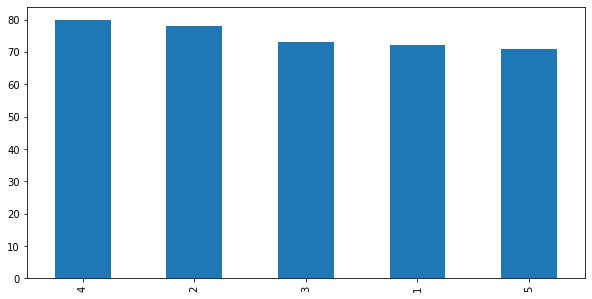

In [ ]:
label_df = pd.DataFrame(data=y_train, columns=['label'])
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
label_df['label'].value_counts().plot(kind='bar', ax=ax1)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

***Model Klasifikasi***

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [ ]:
KNN_model_default = KNeighborsClassifier() #ini kalau diisi, fit tuningnya kosongin
KNN_model_default.fit(x_train, y_train)
y_pred_KNN_default =KNN_model_default.predict(x_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(classification_report(y_valid, y_pred_KNN_default,digits=4))

              precision    recall  f1-score   support

           1     0.6000    0.6818    0.6383        22
           2     0.5556    0.6250    0.5882        16
           3     0.7000    0.6667    0.6829        21
           4     0.4000    0.4000    0.4000        15
           5     0.5625    0.4500    0.5000        20

    accuracy                         0.5745        94
   macro avg     0.5636    0.5647    0.5619        94
weighted avg     0.5749    0.5745    0.5723        94



# **Tuning**

In [ ]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
estimator_KNN = KNeighborsClassifier() 
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

In [ ]:
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5)

In [ ]:
KNN_1=grid_search_KNN.fit(x_train, y_train)
y_pred_KNN1 =KNN_1.predict(x_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(grid_search_KNN.best_params_ ) 

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [ ]:
print('Best Score - KNN:', grid_search_KNN.best_score_ )

Best Score - KNN: 0.6952792792792792


In [ ]:
KNN_2 = KNeighborsClassifier(leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')

In [ ]:
KNN_2.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(leaf_size=20, n_neighbors=1, p=1)

In [ ]:
y_hat = KNN_2.predict(x_train)
y_knn = KNN_2.predict(x_valid)

In [ ]:
print(classification_report(y_valid, y_knn, digits=4))

              precision    recall  f1-score   support

           1     0.6667    0.7273    0.6957        22
           2     0.7143    0.6250    0.6667        16
           3     0.7143    0.7143    0.7143        21
           4     0.4706    0.5333    0.5000        15
           5     0.6667    0.6000    0.6316        20

    accuracy                         0.6489        94
   macro avg     0.6465    0.6400    0.6416        94
weighted avg     0.6541    0.6489    0.6500        94

